In [116]:
from flwr_datasets.partitioner import DirichletPartitioner, IidPartitioner
from flwr_datasets.federated_dataset import FederatedDataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [117]:
N_CLIENTS = 20
DIRICHLET = 0.1
LABELS = 10

In [118]:
partitioner = DirichletPartitioner(
    num_partitions=N_CLIENTS,
    partition_by="label",
    alpha=DIRICHLET,
    min_partition_size=N_CLIENTS,
    self_balancing=False,
    seed=
)
fds = FederatedDataset(dataset='mnist', partitioners={"train": partitioner}, )
# partitioner.is_dataset_assigned()

In [147]:
fds.load_split('train')

Dataset({
    features: ['image', 'label'],
    num_rows: 60000
})

In [119]:
p1 = fds.load_split('train')
p1_treat = pd.DataFrame(p1)
df = p1_treat.groupby('label').count().reset_index()
LABELS = df.shape[0]
print(LABELS)
df

/home/ozymandias/.local/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for mnist contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mnist
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


10


,label,image
0,0,5923
1,1,6742
2,2,5958
3,3,6131
4,4,5842
5,5,5421
6,6,5918
7,7,6265
8,8,5851
9,9,5949


In [120]:
p1 = fds.load_partition(0)

In [121]:
p2 = fds.load_partition(1)

In [122]:
p1_treat = pd.DataFrame(p1)
df = p1_treat.groupby('label').count().reset_index()
p2_treat = pd.DataFrame(p2)
df2 = p1_treat.groupby('label').count().reset_index()


In [123]:
df

,label,image
0,0,2
1,1,17
2,2,2
3,4,136
4,5,211
5,7,50
6,8,21


In [124]:
data = pd.DataFrame({'label':[0,1,2,3,4,5,6,7,8,9]})

In [125]:
data

,label
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [126]:
data = data.merge(df, how='left', left_on='label', right_on='label').fillna(0).rename(columns={'image': "CID 0"})

In [127]:
data.merge(df2, how='left', left_on='label', right_on='label').fillna(0)


,label,CID 0,image
0,0,2.0,2.0
1,1,17.0,17.0
2,2,2.0,2.0
3,3,0.0,0.0
4,4,136.0,136.0
5,5,211.0,211.0
6,6,0.0,0.0
7,7,50.0,50.0
8,8,21.0,21.0
9,9,0.0,0.0


In [128]:
def number_of_client(n):
    data = pd.DataFrame({'label': [0,1,2,3,4,5,6,7,8,9]})
    for client in range(n):
        p1 = fds.load_partition(client)
        p1_treat = pd.DataFrame(p1)
        df = p1_treat.groupby('label').count().reset_index()
        data = data.merge(df, how='left', left_on='label', right_on='label').fillna(0).rename(columns={'image': f'CID {client}'})
    return data


In [129]:
clients_distributions = number_of_client(N_CLIENTS)

In [130]:
clients_distributions.head()

,label,CID 0,CID 1,CID 2,CID 3,CID 4,CID 5,CID 6,CID 7,CID 8,...,CID 10,CID 11,CID 12,CID 13,CID 14,CID 15,CID 16,CID 17,CID 18,CID 19
0,0,2.0,292.0,1644.0,1.0,226.0,0.0,939.0,314.0,4.0,...,184.0,34.0,109.0,31.0,0.0,0.0,2113.0,0.0,0.0,30
1,1,17.0,0.0,0.0,0.0,0.0,0.0,17.0,20.0,3394.0,...,3.0,2232.0,2.0,0.0,1.0,568.0,0.0,0.0,0.0,158
2,2,2.0,0.0,0.0,0.0,65.0,0.0,89.0,0.0,1248.0,...,41.0,0.0,0.0,26.0,0.0,2741.0,1356.0,2.0,0.0,388
3,3,0.0,66.0,63.0,1.0,138.0,3.0,0.0,1310.0,0.0,...,0.0,4486.0,0.0,0.0,0.0,52.0,1.0,10.0,0.0,1
4,4,136.0,1045.0,0.0,316.0,0.0,0.0,3.0,0.0,0.0,...,3148.0,0.0,670.0,3.0,0.0,3.0,0.0,0.0,516.0,2


In [131]:
clients_distributions = clients_distributions.T.reset_index()

In [132]:
clients_distributions.head()

,index,0,1,2,3,4,5,6,7,8,9
0,label,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
1,CID 0,2.0,17.0,2.0,0.0,136.0,211.0,0.0,50.0,21.0,0.0
2,CID 1,292.0,0.0,0.0,66.0,1045.0,597.0,1.0,6.0,401.0,0.0
3,CID 2,1644.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,13.0
4,CID 3,1.0,0.0,0.0,1.0,316.0,179.0,0.0,0.0,0.0,728.0


In [133]:
clients_distributions.set_index('index', inplace=True)

In [134]:
clients_distributions.head(3)

,0,1,2,3,4,5,6,7,8,9
index,,,,,,,,,,
label,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
CID 0,2.0,17.0,2.0,0.0,136.0,211.0,0.0,50.0,21.0,0.0
CID 1,292.0,0.0,0.0,66.0,1045.0,597.0,1.0,6.0,401.0,0.0


In [135]:
clients_distributions.loc['CID 5']

0       0.0
1       0.0
2       0.0
3       3.0
4       0.0
5       0.0
6    1720.0
7     145.0
8       1.0
9       0.0
Name: CID 5, dtype: float64

In [137]:
clients_distributions = clients_distributions.drop('label')

In [138]:
clients_distributions.head()

,0,1,2,3,4,5,6,7,8,9
index,,,,,,,,,,
CID 0,2.0,17.0,2.0,0.0,136.0,211.0,0.0,50.0,21.0,0.0
CID 1,292.0,0.0,0.0,66.0,1045.0,597.0,1.0,6.0,401.0,0.0
CID 2,1644.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,13.0
CID 3,1.0,0.0,0.0,1.0,316.0,179.0,0.0,0.0,0.0,728.0
CID 4,226.0,0.0,65.0,138.0,0.0,0.0,0.0,28.0,0.0,1.0


In [139]:
percenteg = clients_distributions.div(
    clients_distributions.sum(axis=1),
    axis=0
)

In [140]:
percenteg = percenteg.rename(columns={i: f'Class {i}' for i in range(LABELS)})

Text(0.5, 0, '')

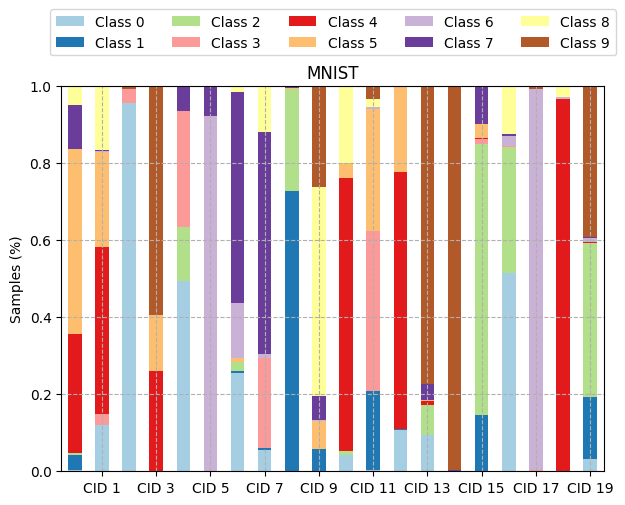

In [142]:
# clients_distributions_log =   # Adicionando 1 para evitar log(0)
ax = percenteg.plot(
    kind='bar',
    stacked=True,
    figsize=(7,5),
    colormap='Paired')

plt.xticks(range(1,20,2), rotation=0)
ax.grid(True, linestyle='--')
# ax.tick_params()
# ax.set_title(f"Client's data distribution - Dirichlet {DIRICHLET}")
ax.legend(loc=(-0.02,1.08), ncols=5)
ax.set_title("MNIST")
ax.set_ylim(0,1.0)
ax.set_ylabel("Samples (%)")
ax.set_xlabel("")
